In [2]:
import pandas as pd

# Update the file paths based on where your CSV files are located in Colab
patients = pd.read_csv('/content/PATIENTS.csv')
admissions = pd.read_csv('/content/ADMISSIONS.csv')
diagnoses = pd.read_csv('/content/DIAGNOSES_ICD.csv')
lab_events = pd.read_csv('/content/LABEVENTS.csv')
prescriptions = pd.read_csv('/content/PRESCRIPTIONS.csv')

# Display the first few rows of each dataset
print("Patients Table:")
print(patients.head(), "\n")

print("Admissions Table:")
print(admissions.head(), "\n")

print("Diagnoses Table:")
print(diagnoses.head(), "\n")

print("Lab Events Table:")
print(lab_events.head(), "\n")

print("Prescriptions Table:")
print(prescriptions.head(), "\n")


Patients Table:
   row_id  subject_id gender                  dob                  dod  \
0    9467       10006      F  2094-03-05 00:00:00  2165-08-12 00:00:00   
1    9472       10011      F  2090-06-05 00:00:00  2126-08-28 00:00:00   
2    9474       10013      F  2038-09-03 00:00:00  2125-10-07 00:00:00   
3    9478       10017      F  2075-09-21 00:00:00  2152-09-12 00:00:00   
4    9479       10019      M  2114-06-20 00:00:00  2163-05-15 00:00:00   

              dod_hosp              dod_ssn  expire_flag  
0  2165-08-12 00:00:00  2165-08-12 00:00:00            1  
1  2126-08-28 00:00:00                  NaN            1  
2  2125-10-07 00:00:00  2125-10-07 00:00:00            1  
3                  NaN  2152-09-12 00:00:00            1  
4  2163-05-15 00:00:00  2163-05-15 00:00:00            1   

Admissions Table:
   row_id  subject_id  hadm_id            admittime            dischtime  \
0   12258       10006   142345  2164-10-23 21:09:00  2164-11-01 17:15:00   
1   12263    

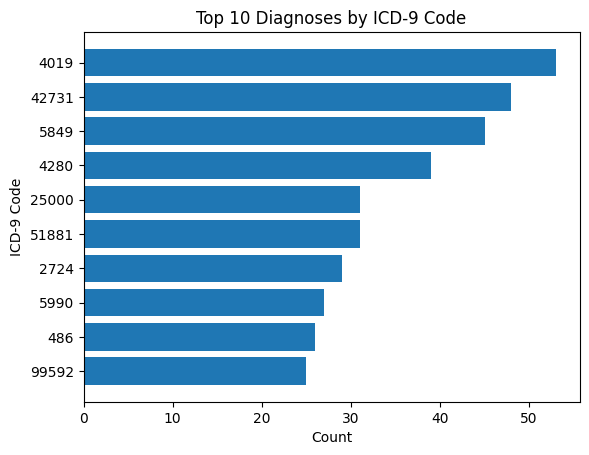

In [3]:
import matplotlib.pyplot as plt

# Get the top 10 most common diagnosis codes
top_diagnoses = diagnoses['icd9_code'].value_counts().head(10)

# Plot the data
plt.barh(top_diagnoses.index, top_diagnoses.values)
plt.xlabel('Count')
plt.ylabel('ICD-9 Code')
plt.title('Top 10 Diagnoses by ICD-9 Code')
plt.gca().invert_yaxis()
plt.show()


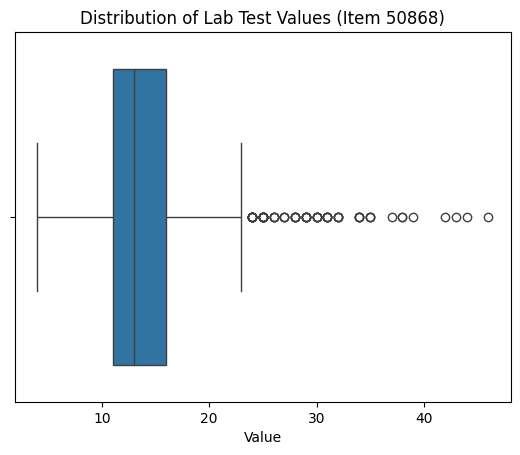

In [4]:
import seaborn as sns

# Filter for a specific lab test (itemid 50868)
lab_test = lab_events[lab_events['itemid'] == 50868]

# Plot the distribution of lab values
sns.boxplot(x=lab_test['valuenum'])
plt.title('Distribution of Lab Test Values (Item 50868)')
plt.xlabel('Value')
plt.show()


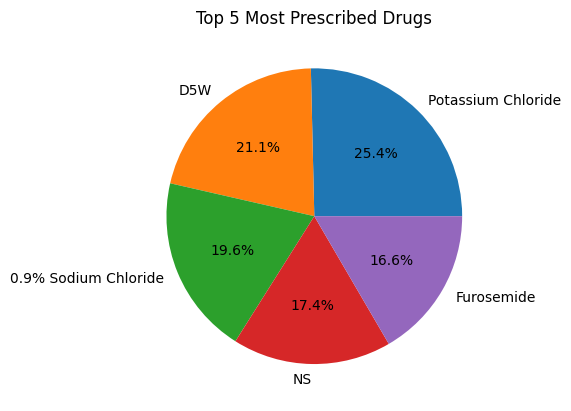

In [5]:
# Get the top 5 most prescribed drugs
top_drugs = prescriptions['drug'].value_counts().head(5)

# Plot the data
top_drugs.plot(kind='pie', autopct='%1.1f%%', title='Top 5 Most Prescribed Drugs')
plt.ylabel('')  # Remove y-axis label
plt.show()


<ipython-input-6-6f31311f1eca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_lab_data['charttime'] = pd.to_datetime(patient_lab_data['charttime'])


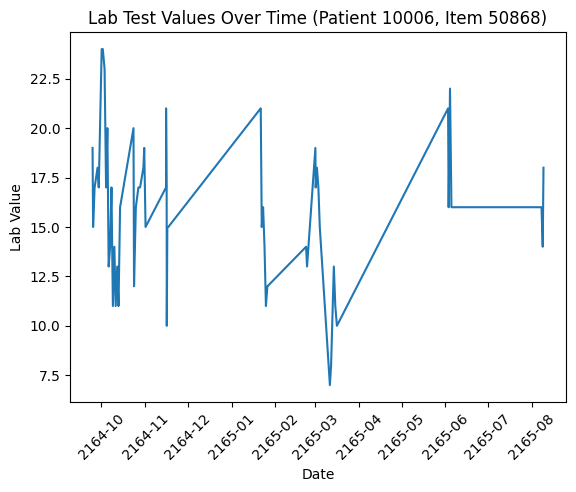

In [6]:
# Filter for a specific lab test and subject
patient_lab_data = lab_events[(lab_events['subject_id'] == 10006) & (lab_events['itemid'] == 50868)]

# Convert 'charttime' to datetime format
patient_lab_data['charttime'] = pd.to_datetime(patient_lab_data['charttime'])

# Plot lab values over time
plt.plot(patient_lab_data['charttime'], patient_lab_data['valuenum'])
plt.title('Lab Test Values Over Time (Patient 10006, Item 50868)')
plt.xlabel('Date')
plt.ylabel('Lab Value')
plt.xticks(rotation=45)
plt.show()


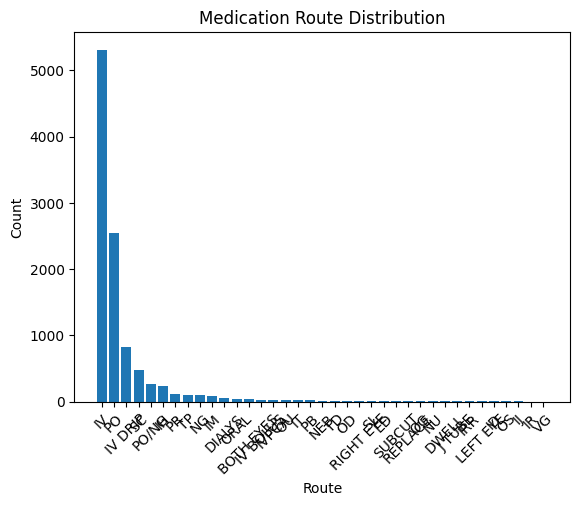

In [7]:
# Get the count of each administration route
route_distribution = prescriptions['route'].value_counts()

# Plot the data
plt.bar(route_distribution.index, route_distribution.values)
plt.title('Medication Route Distribution')
plt.xlabel('Route')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
